# Stroke Prognosis: Prueba de los Modelos

<p>
Curso de Minería de Datos <br>
Autor: Cristian Pavez Hormazábal
</p>

In [1]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import sklearn as sk
import yellowbrick as yb

In [2]:
# Importación de datos
dataset = pd.read_csv("all-data.csv")

# Formateo de los datos
dataset.drop("id", axis=1, inplace=True)
dataset['gender'] = dataset['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['work_type'] = dataset['work_type'].map({'Private': 4, 'Self-employed': 2, 'Govt_job': 3, 'children': 1, 'Never_worked': 0})
dataset['Residence_type'] = dataset['Residence_type'].map({'Rural': 0, 'Urban': 1})
dataset['smoking_status'] = dataset['smoking_status'].map({'Unknown': 0, 'never smoked': 1, 'formerly smoked': 2, 'smokes': 3})

# Eliminar filas con valores perdidos
dataset = dataset.dropna()

# Dividir el dataset en personas con y sin stroke
stroke_data = dataset[dataset['stroke'] == 1]
no_stroke_data = dataset[dataset['stroke'] == 0]

# Sobre-representar los datos de stroke (multiplicar por 22)
stroke_data_overrepresented = pd.concat([stroke_data] * 22, ignore_index=True)

# Combinar los datasets
balanced_dataset = pd.concat([stroke_data_overrepresented, no_stroke_data], ignore_index=True)

# Mezclar los datos para evitar orden
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar el balance
print(balanced_dataset['stroke'].value_counts())

stroke
0    4700
1    4598
Name: count, dtype: int64


In [3]:
training_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

x1 = dataset[training_columns]
y1 = dataset['stroke']

x2 = balanced_dataset[training_columns]
y2 = balanced_dataset['stroke']


x1_train, x1_test, y1_train, y1_test = sk.model_selection.train_test_split(x1, y1, random_state = 42, test_size=0.2, shuffle=True)
x2_train, x2_test, y2_train, y2_test = sk.model_selection.train_test_split(x2, y2, random_state = 42, test_size=0.2, shuffle=True)

0.8706720977596741


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


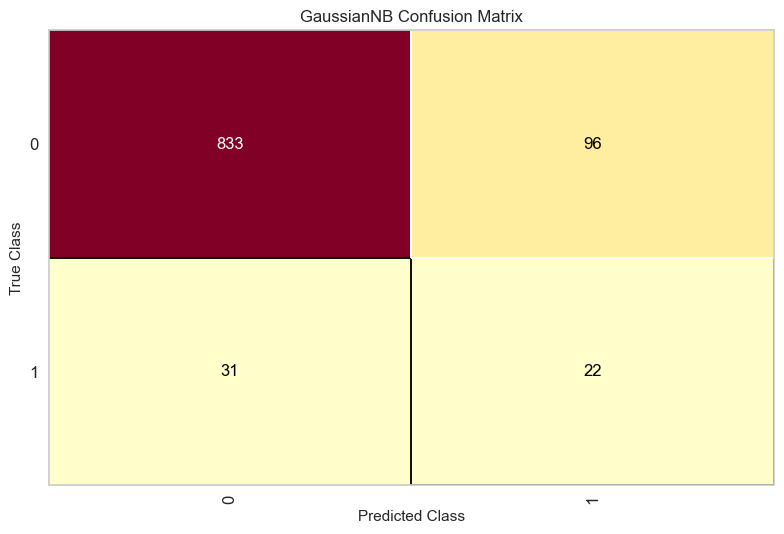

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [4]:
naive_bayes = sk.naive_bayes.GaussianNB()
naive_bayes.fit(x1_train, y1_train)
previsoes = naive_bayes.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

0.7559139784946236


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


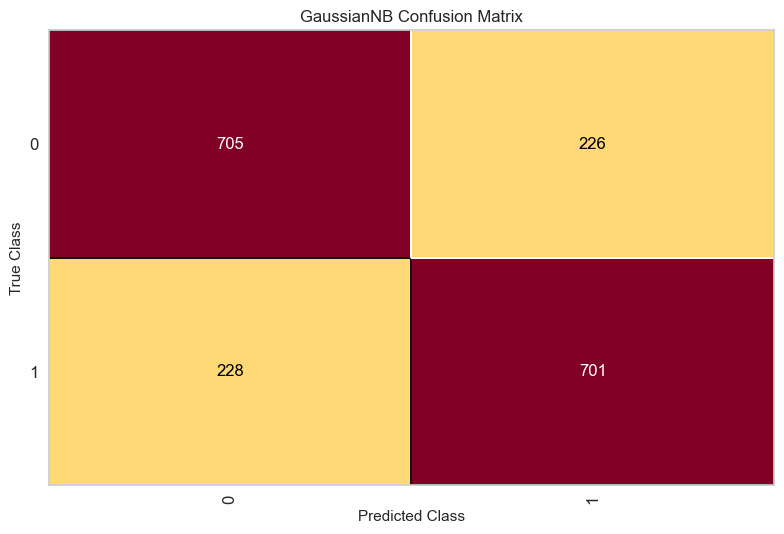

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [5]:
naive_bayes = sk.naive_bayes.GaussianNB()
naive_bayes.fit(x2_train, y2_train)
previsoes = naive_bayes.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


0.9429735234215886


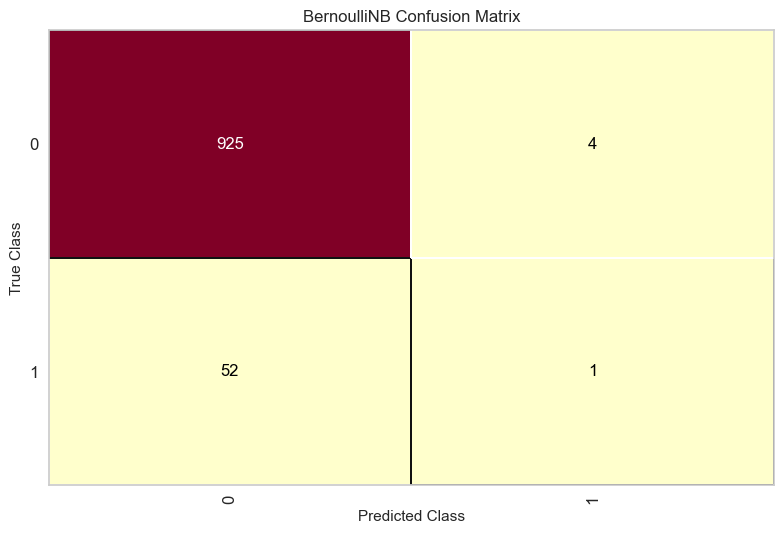

<Axes: title={'center': 'BernoulliNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [6]:
naive_bayes = sk.naive_bayes.BernoulliNB()
naive_bayes.fit(x1_train, y1_train)
previsoes = naive_bayes.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


0.656989247311828


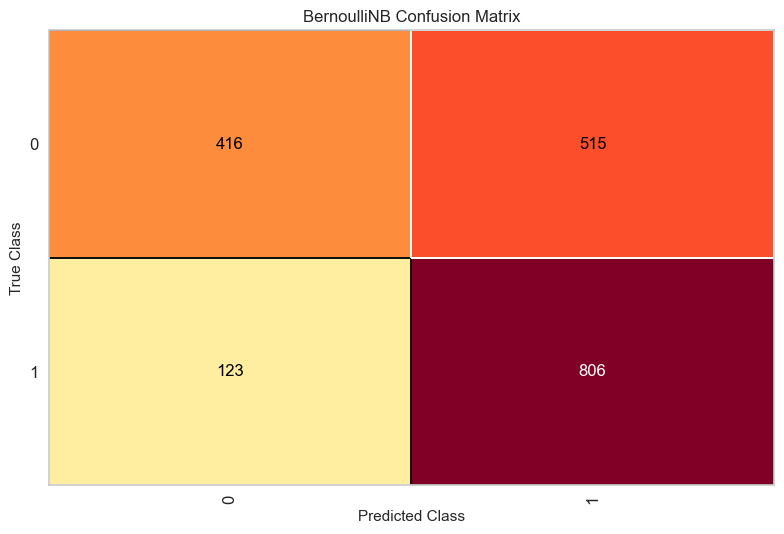

<Axes: title={'center': 'BernoulliNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [7]:
naive_bayes = sk.naive_bayes.BernoulliNB()
naive_bayes.fit(x2_train, y2_train)
previsoes = naive_bayes.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9164969450101833


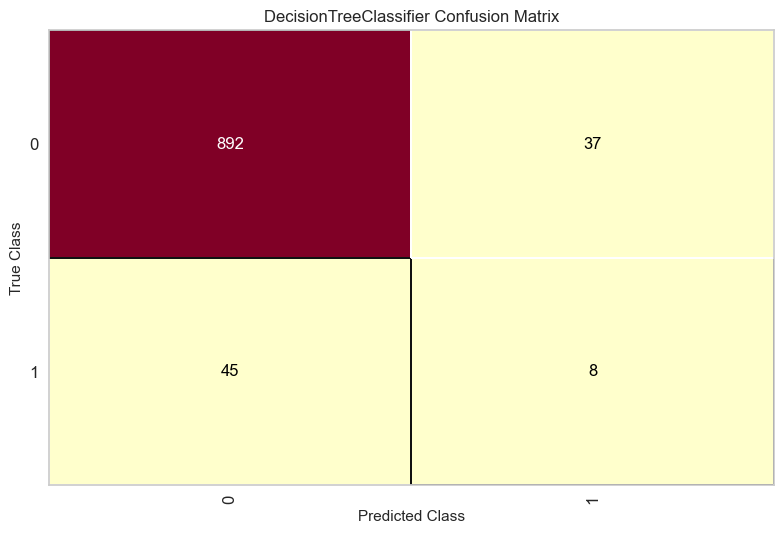

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [8]:
tree = sk.tree.DecisionTreeClassifier()
tree.fit(x1_train, y1_train)
previsoes = tree.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(tree)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9736559139784946


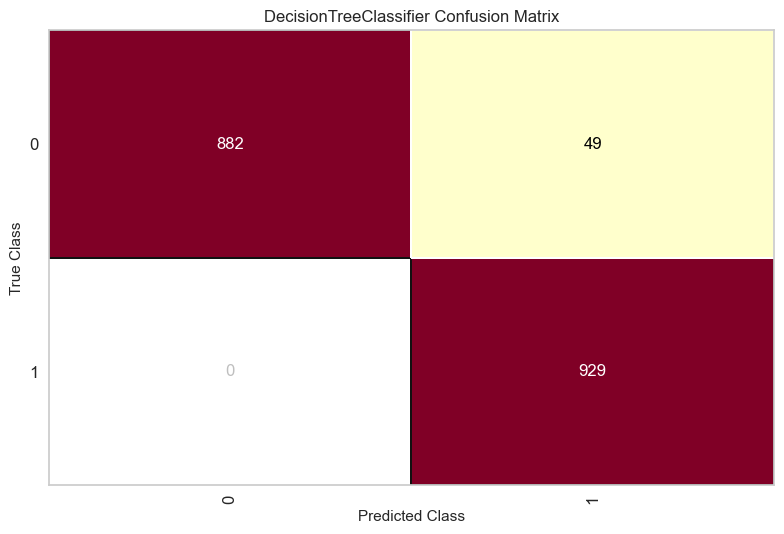

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [9]:
tree = sk.tree.DecisionTreeClassifier()
tree.fit(x2_train, y2_train)
previsoes = tree.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(tree)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

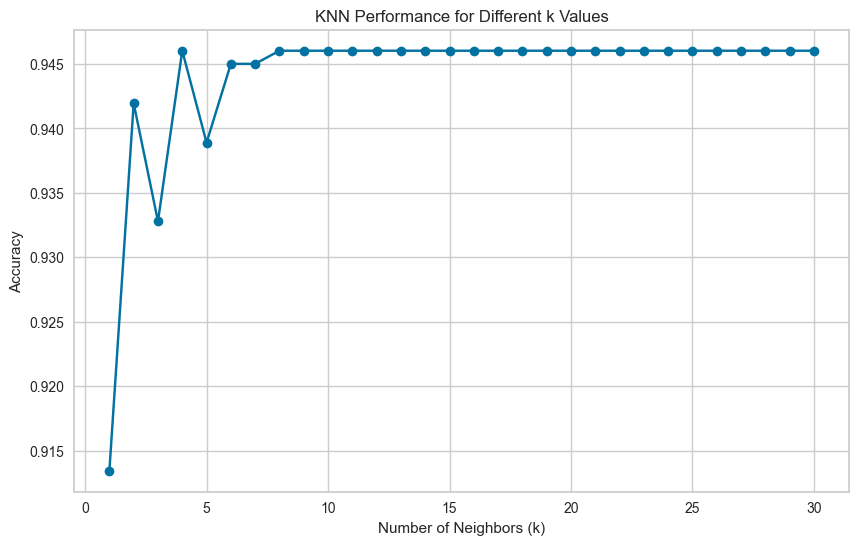

In [10]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix

# Loop to test all k values from 1 to 30
k_values = range(1, 31)
scores = []
for k in k_values:
    knn = sk.neighbors.KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(x1_train, y1_train)
    previsoes = knn.predict(x1_test)
    
    # Calculate and store the score
    score = knn.score(x1_test, y1_test)
    scores.append(score)
    
    """
    # Visualize the confusion matrix
    cm = ConfusionMatrix(knn)
    cm.fit(x1_train, y1_train)
    cm.score(x1_test, y1_test)
    cm.show()
    
    # Print classification report
    print(f"Classification Report for k={k}:")
    print(classification_report(y1_test, previsoes))
    """
    
# Plot the scores for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.title('KNN Performance for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9460285132382892


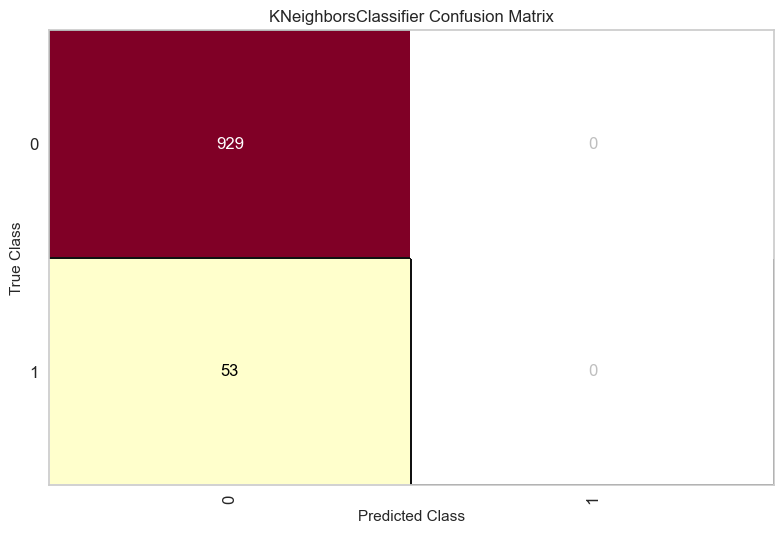

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [11]:
knn = sk.neighbors.KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
knn.fit(x1_train, y1_train)
previsoes = knn.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(knn)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

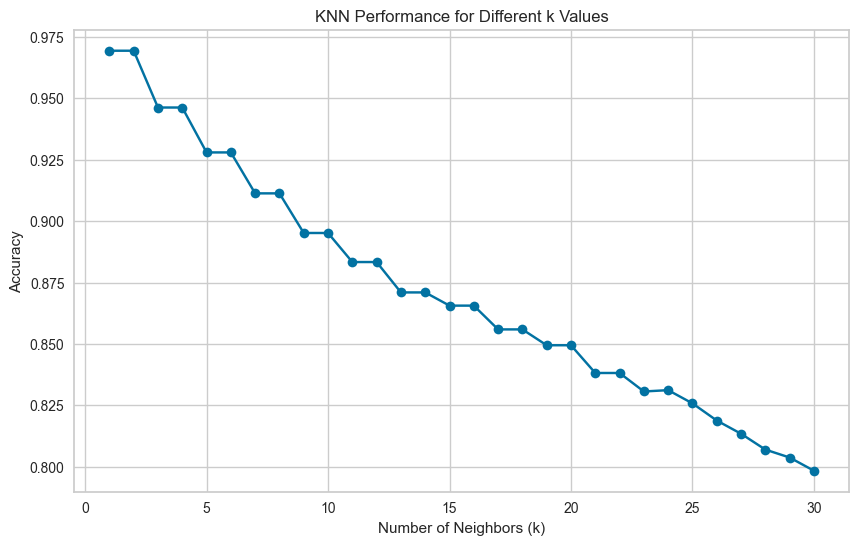

In [12]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix

# Loop to test all k values from 1 to 30
k_values = range(1, 31)
scores = []
for k in k_values:
    knn = sk.neighbors.KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(x2_train, y2_train)
    previsoes = knn.predict(x2_test)
    
    # Calculate and store the score
    score = knn.score(x2_test, y2_test)
    scores.append(score)
    
    """
    # Visualize the confusion matrix
    cm = ConfusionMatrix(knn)
    cm.fit(x2_train, y2_train)
    cm.score(x2_test, y2_test)
    cm.show()
    
    # Print classification report
    print(f"Classification Report for k={k}:")
    print(classification_report(y2_test, previsoes))
    """
    
# Plot the scores for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.title('KNN Performance for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9693548387096774


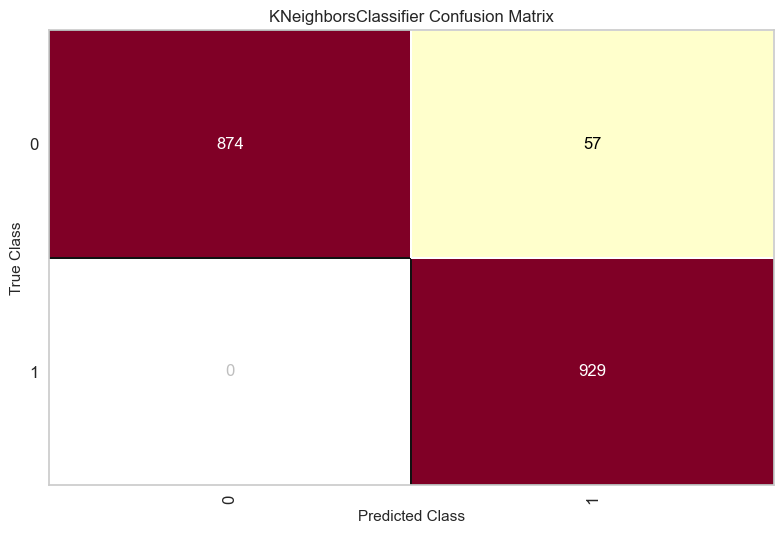

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [13]:
knn = sk.neighbors.KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(x2_train, y2_train)
previsoes = knn.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(knn)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8443 - loss: 2.5537 - val_accuracy: 0.9618 - val_loss: 0.5718
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8443 - loss: 2.5537 - val_accuracy: 0.9618 - val_loss: 0.5718
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9198 - loss: 0.7500 - val_accuracy: 0.9618 - val_loss: 0.3519
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9198 - loss: 0.7500 - val_accuracy: 0.9618 - val_loss: 0.3519
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9358 - loss: 0.4695 - val_accuracy: 0.9618 - val_loss: 0.1832
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9358 - loss: 0.4695 - val_accuracy: 0.9618 - val_loss: 0.1832
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9502 - loss: 0.2449 - val_accuracy: 0.9618 - val_loss: 0.2038
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9502 - loss: 0.2449 - val_accuracy: 0.9618 - val_loss:

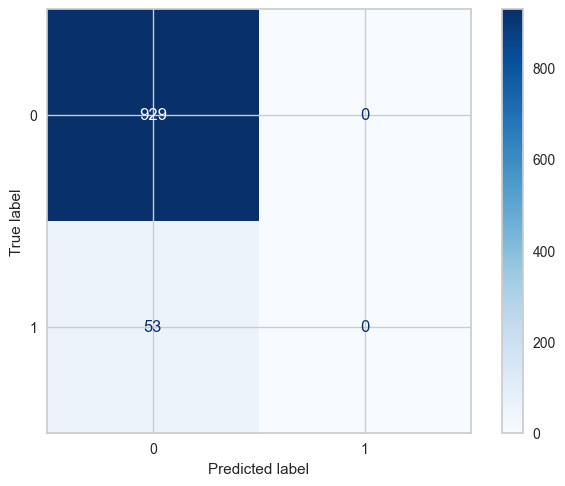

In [14]:
# Implementación de una red neuronal para la clasificación
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convertir las etiquetas a formato categórico
num_classes = len(y1.unique())
y1_train_categorical = to_categorical(y1_train, num_classes)
y1_test_categorical = to_categorical(y1_test, num_classes)

# Crear el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(x1_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x1_train, y1_train_categorical, epochs=50, batch_size=32, validation_split=0.2)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar predicciones
y1_pred = model.predict(x1_test)
y1_pred_classes = np.argmax(y1_pred, axis=1)  # Convertir predicciones a clases
y1_test_classes = np.argmax(y1_test_categorical, axis=1)  # Convertir etiquetas reales a clases

# Crear la matriz de confusión
cm = confusion_matrix(y1_test_classes, y1_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap='Blues')
plt.show()

Epoch 1/50


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5487 - loss: 4.3346 - val_accuracy: 0.6929 - val_loss: 0.6267
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5487 - loss: 4.3346 - val_accuracy: 0.6929 - val_loss: 0.6267
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6306 - loss: 0.7391 - val_accuracy: 0.7272 - val_loss: 0.5938
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6306 - loss: 0.7391 - val_accuracy: 0.7272 - val_loss: 0.5938
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6735 - loss: 0.6210 - val_accuracy: 0.7238 - val_loss: 0.5673
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6735 - loss: 0.6210 - val_accuracy: 0.7238 - val_loss: 0.5673
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7169 - loss: 0.5840 - val_accuracy: 0.7359 - val_loss: 0.5331
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7169 - loss: 0.5840 - val_accuracy: 0.7359 - val_

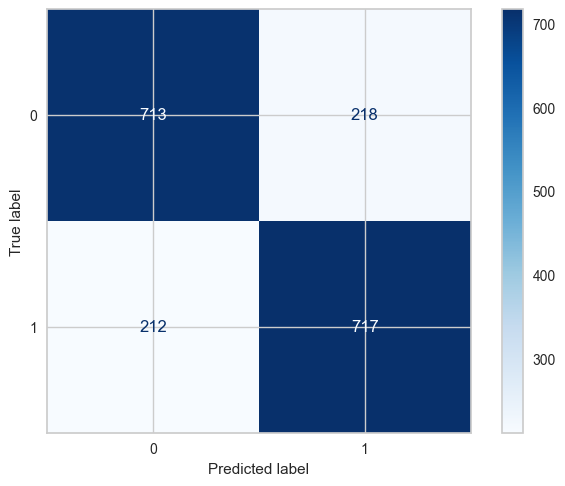

In [15]:
# Implementación de una red neuronal para la clasificación
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convertir las etiquetas a formato categórico
num_classes = len(y2.unique())
y2_train_categorical = to_categorical(y2_train, num_classes)
y2_test_categorical = to_categorical(y2_test, num_classes)

# Crear el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(x2_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x2_train, y2_train_categorical, epochs=50, batch_size=32, validation_split=0.2)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar predicciones
y2_pred = model.predict(x2_test)
y2_pred_classes = np.argmax(y2_pred, axis=1)  # Convertir predicciones a clases
y2_test_classes = np.argmax(y2_test_categorical, axis=1)  # Convertir etiquetas reales a clases

# Crear la matriz de confusión
cm = confusion_matrix(y2_test_classes, y2_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap='Blues')
plt.show()

0.9460285132382892


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


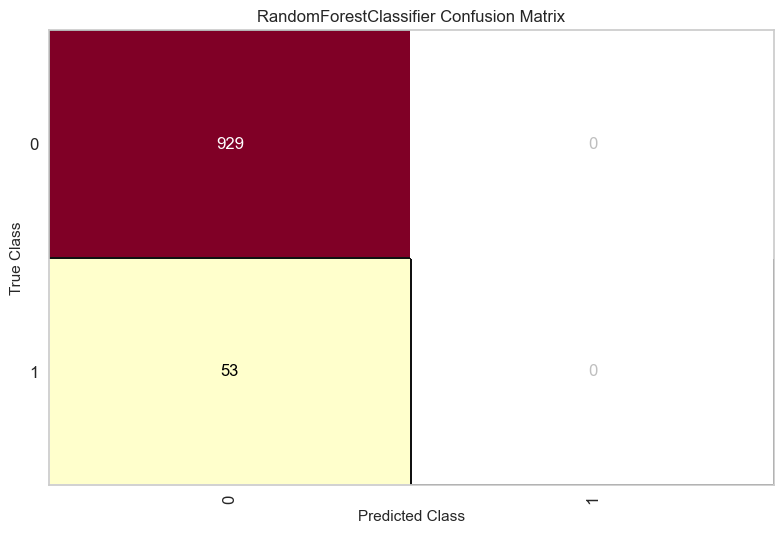

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x1_train, y1_train)
rf_predictions = rf.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(rf)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

0.9930107526881721


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


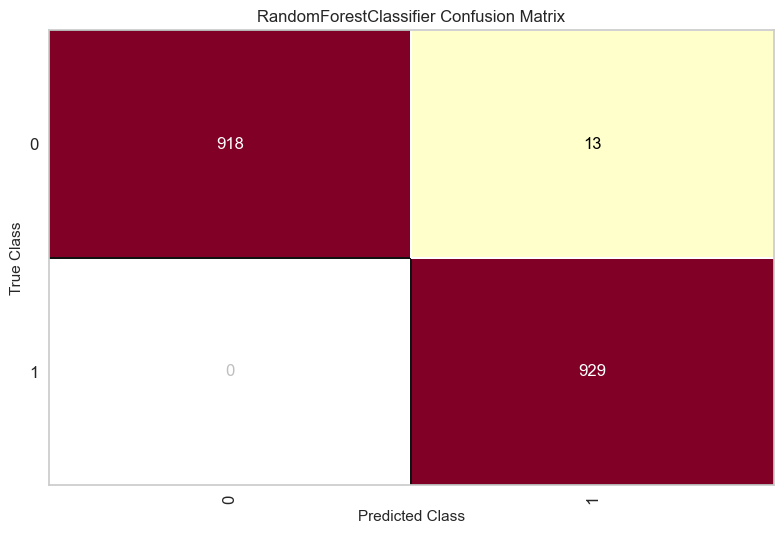

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x2_train, y2_train)
rf_predictions = rf.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(rf)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9460285132382892


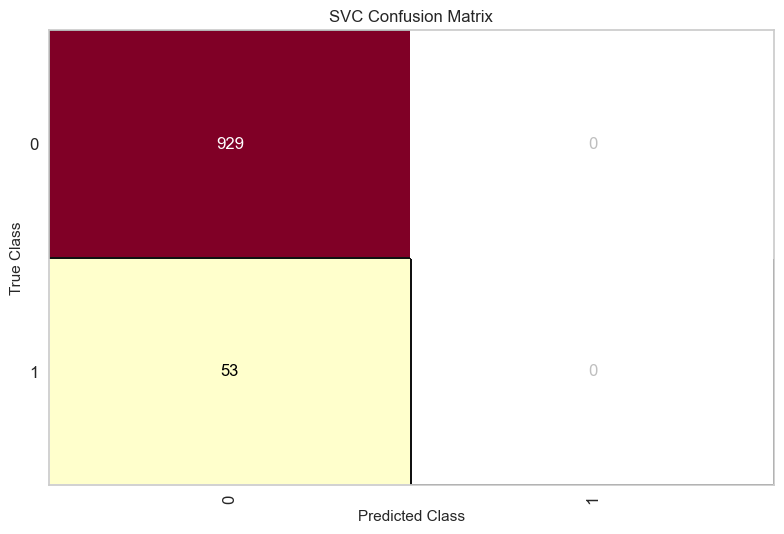

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [18]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42)
svm.fit(x1_train, y1_train)
svm_predictions = svm.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(svm)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.7602150537634409


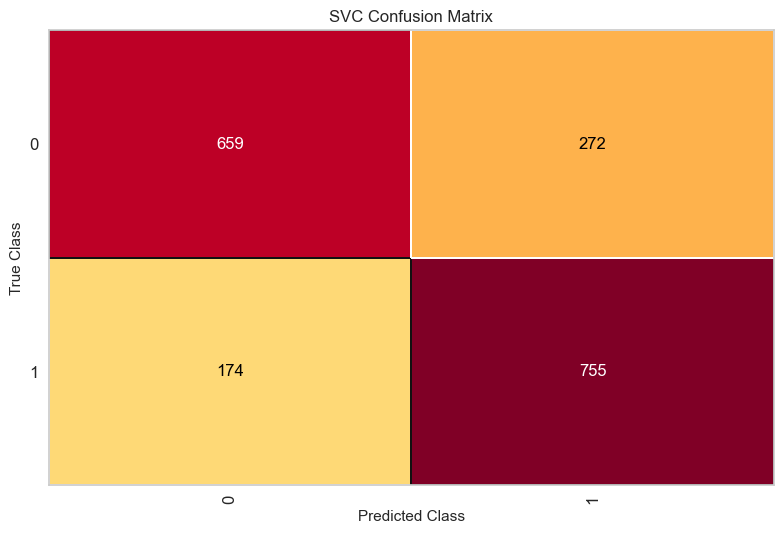

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [19]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42)
svm.fit(x2_train, y2_train)
svm_predictions = svm.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(svm)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

0.9460285132382892


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


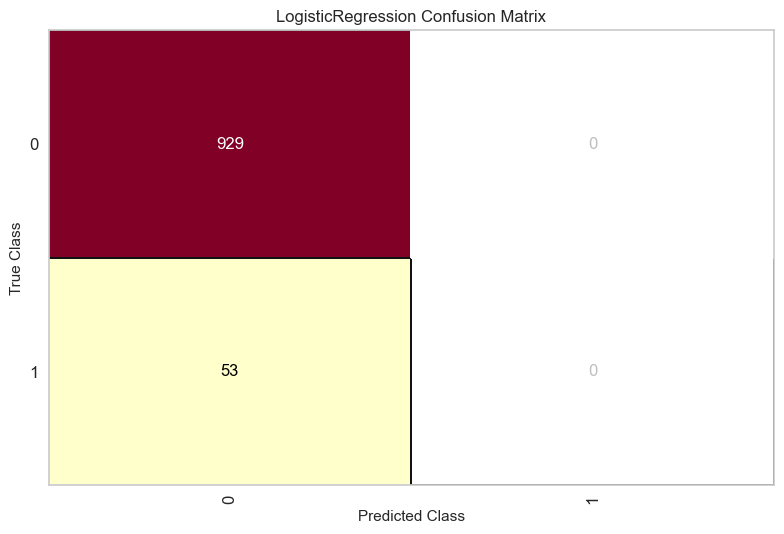

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(x1_train, y1_train)
logreg_predictions = logreg.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(logreg)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

0.7741935483870968


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


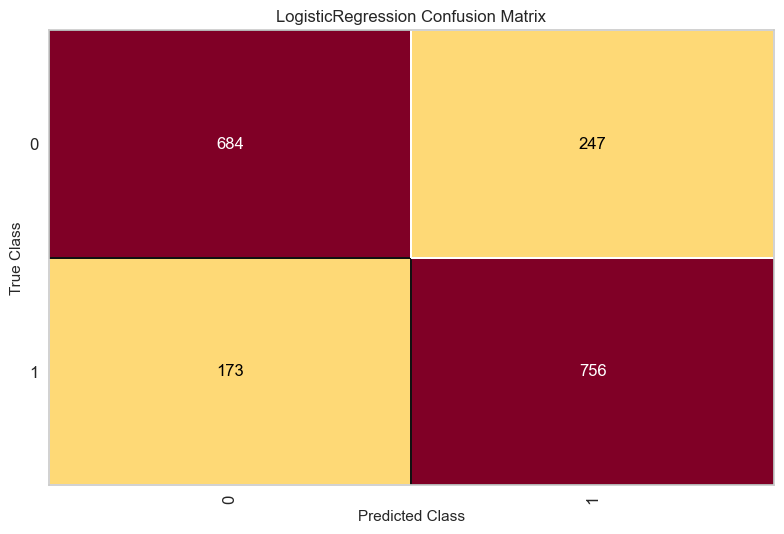

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from sklearn.linear.model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(x2_train, y2_train)
logreg_predictions = logreg.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(logreg)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

0.939918533604888


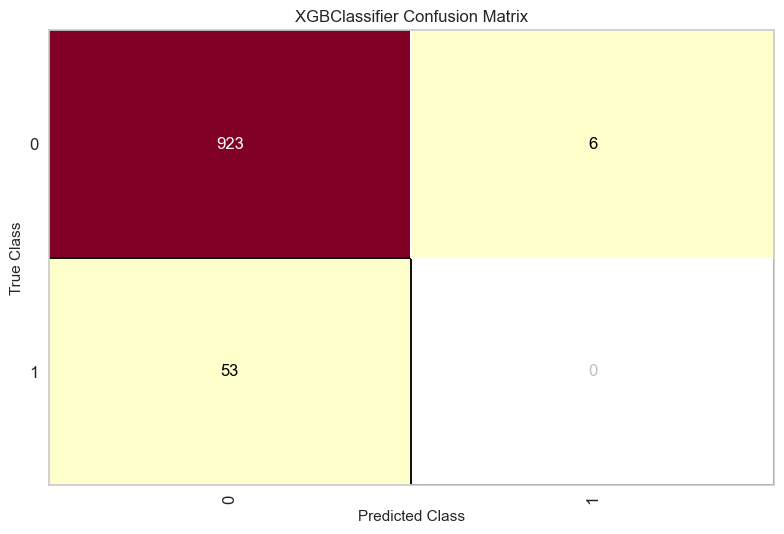

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(x1_train, y1_train)
xgb_predictions = xgb.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(xgb)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

0.9725806451612903


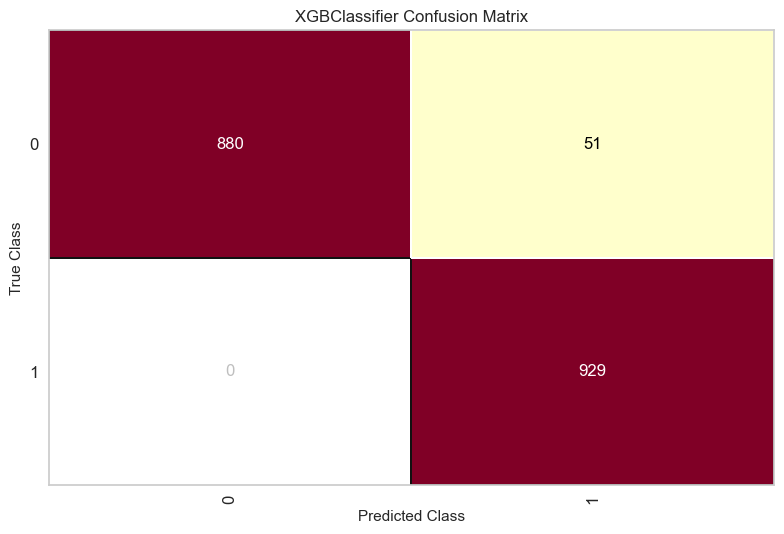

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(x2_train, y2_train)
xgb_predictions = xgb.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(xgb)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

[LightGBM] [Info] Number of positive: 156, number of negative: 3771
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 3927, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039725 -> initscore=-3.185239
[LightGBM] [Info] Start training from score -3.185239
0.9419551934826884


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


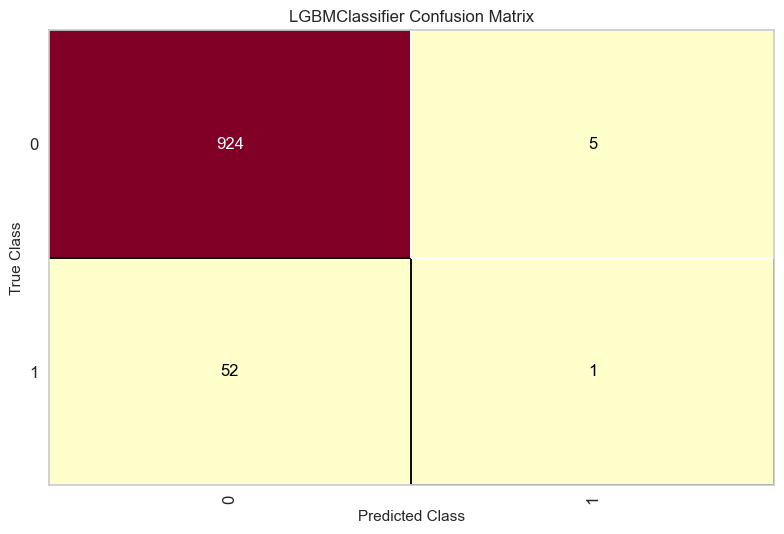

<Axes: title={'center': 'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [24]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x1_train, y1_train)
lgbm_predictions = lgbm.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(lgbm)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

[LightGBM] [Info] Number of positive: 3669, number of negative: 3769
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 7438, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493278 -> initscore=-0.026891
[LightGBM] [Info] Start training from score -0.026891
0.9580645161290322


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


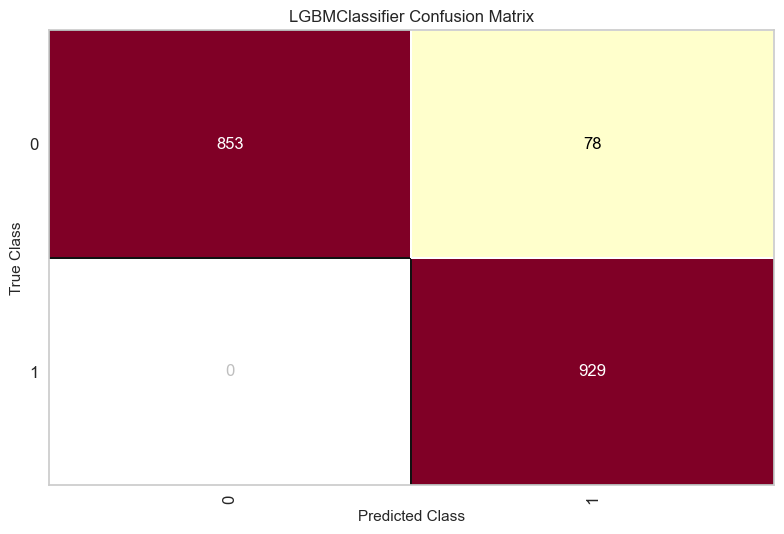

<Axes: title={'center': 'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [25]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x2_train, y2_train)
lgbm_predictions = lgbm.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(lgbm)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

0.9460285132382892


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


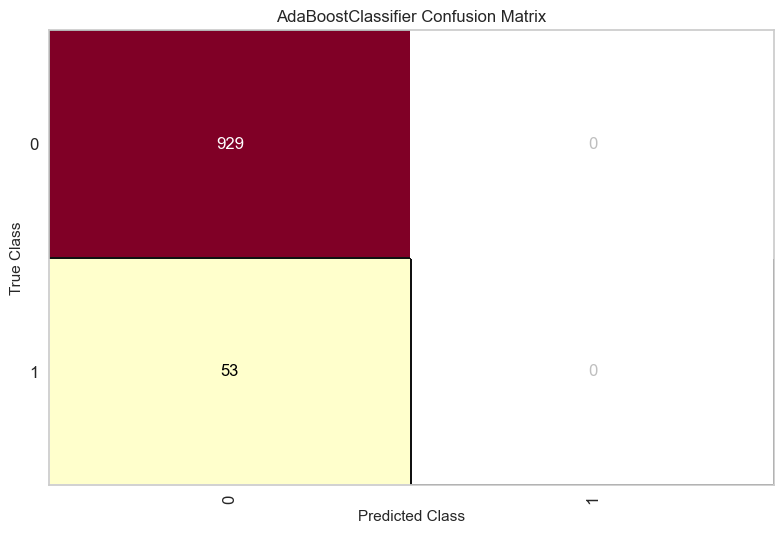

<Axes: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [26]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(x1_train, y1_train)
adaboost_predictions = adaboost.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(adaboost)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.7661290322580645


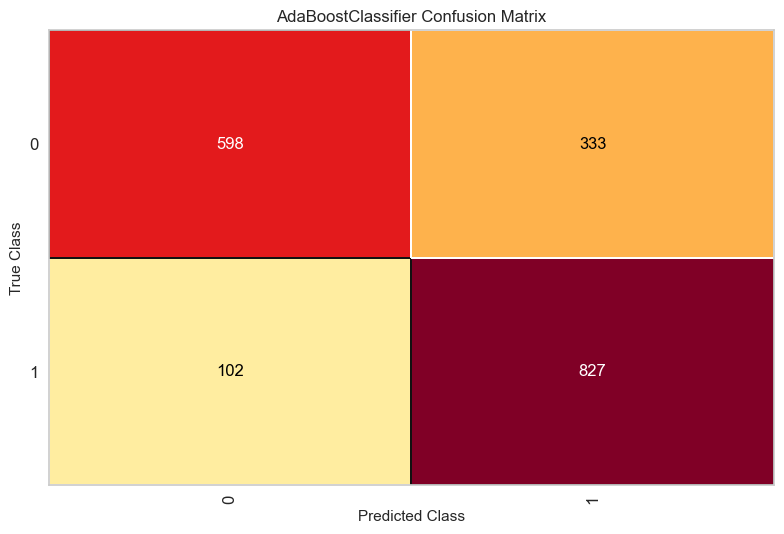

<Axes: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [27]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(x2_train, y2_train)
adaboost_predictions = adaboost.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(adaboost)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

0.939918533604888


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


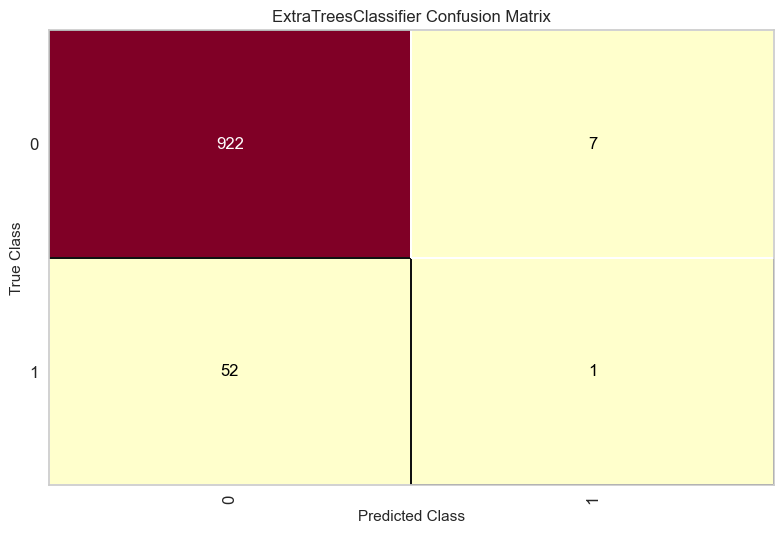

<Axes: title={'center': 'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(x1_train, y1_train)
etc_predictions = etc.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(etc)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


0.9967741935483871


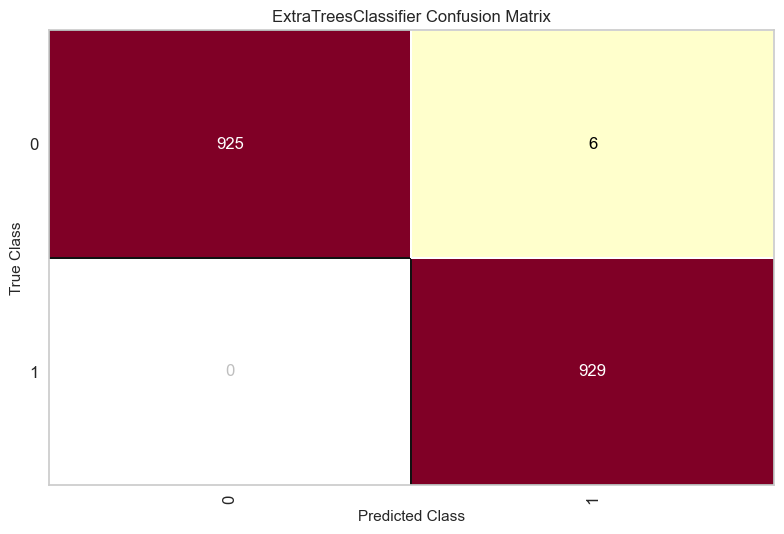

<Axes: title={'center': 'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(x2_train, y2_train)
etc_predictions = etc.predict(x2_test) 

cm = yb.classifier.ConfusionMatrix(etc)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

0.9419551934826884


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


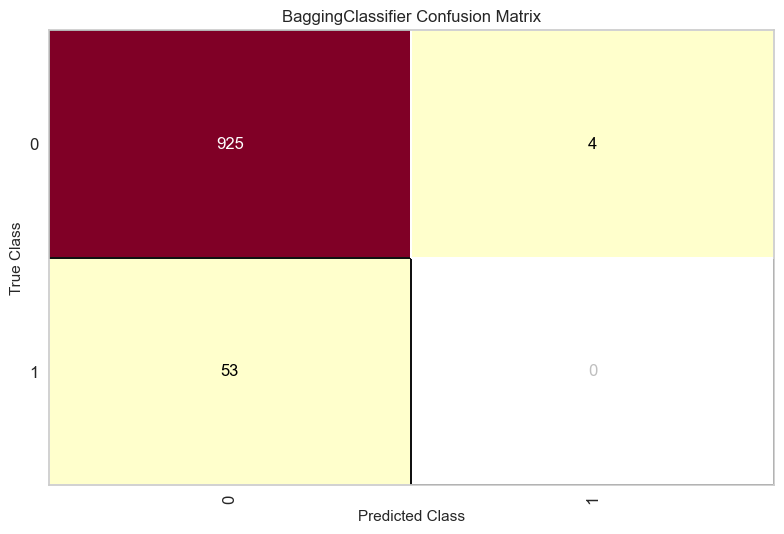

<Axes: title={'center': 'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier  # Importar DecisionTreeClassifier

# Crear el modelo Bagging con DecisionTreeClassifier como base
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(x1_train, y1_train)
bagging_predictions = bagging.predict(x1_test)

# Visualizar la matriz de confusión con Yellowbrick
cm = yb.classifier.ConfusionMatrix(bagging)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


0.989247311827957


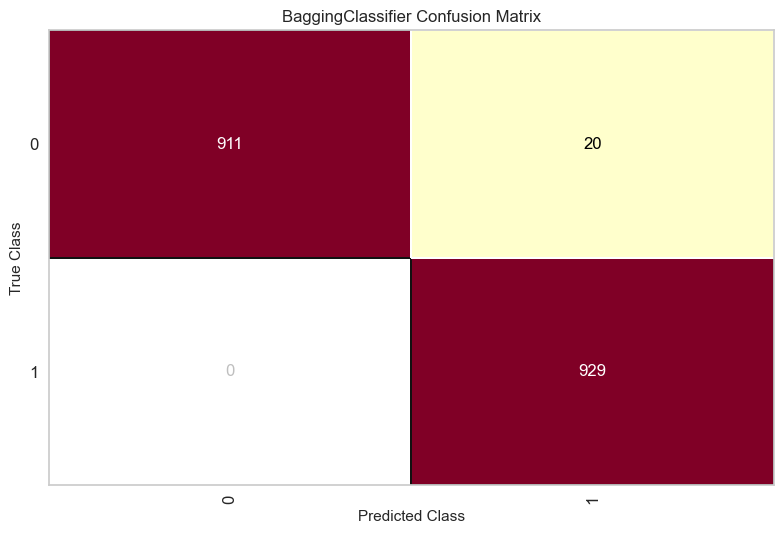

<Axes: title={'center': 'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier  # Importar DecisionTreeClassifier

# Crear el modelo Bagging con DecisionTreeClassifier como base
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(x2_train, y2_train)
bagging_predictions = bagging.predict(x2_test)

# Visualizar la matriz de confusión con Yellowbrick
cm = yb.classifier.ConfusionMatrix(bagging)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Precisión del modelo Bagging con ETC: 0.9439918533604889


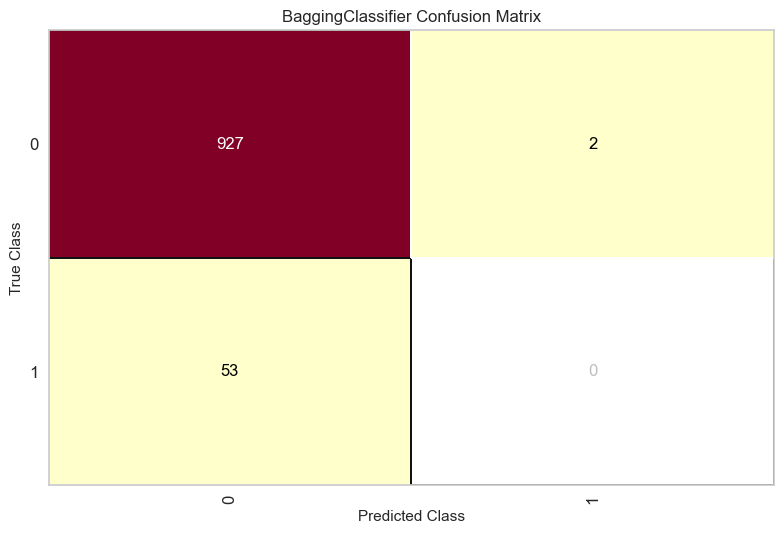

<Axes: title={'center': 'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from yellowbrick.classifier import ConfusionMatrix

# Crear el modelo Bagging con ExtraTreesClassifier como base
bagging = BaggingClassifier(estimator=ExtraTreesClassifier(n_estimators=100, random_state=42), 
                            n_estimators=50, random_state=42)
bagging.fit(x1_train, y1_train)
bagging_predictions = bagging.predict(x1_test)

# Visualizar la matriz de confusión con Yellowbrick
cm = ConfusionMatrix(bagging, classes=np.unique(y1_train))
cm.fit(x1_train, y1_train)
score_bagging_etc = cm.score(x1_test, y1_test)
print(f"Precisión del modelo Bagging con ETC: {score_bagging_etc}")
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Precisión del modelo Bagging con ETC: 0.9940860215053764


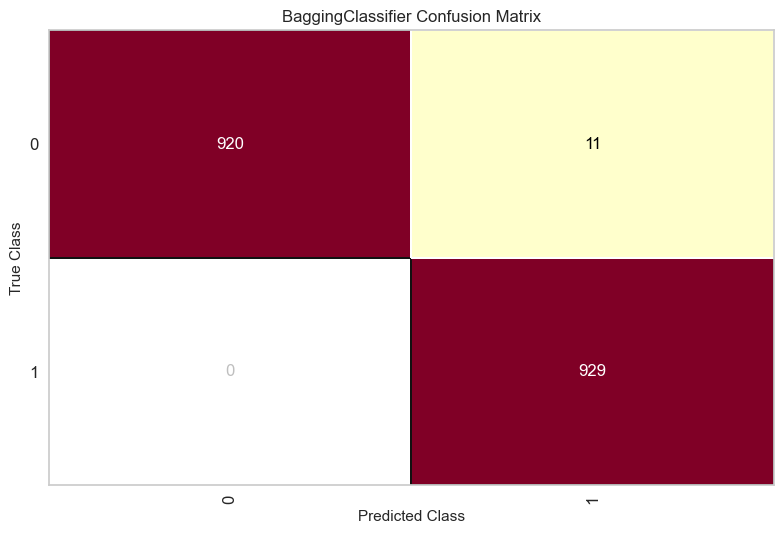

<Axes: title={'center': 'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [33]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from yellowbrick.classifier import ConfusionMatrix

# Crear el modelo Bagging con ExtraTreesClassifier como base
bagging = BaggingClassifier(estimator=ExtraTreesClassifier(n_estimators=100, random_state=42), 
                            n_estimators=50, random_state=42)
bagging.fit(x2_train, y2_train)
bagging_predictions = bagging.predict(x2_test)

# Visualizar la matriz de confusión con Yellowbrick
cm = ConfusionMatrix(bagging, classes=np.unique(y2_train))
cm.fit(x2_train, y2_train)
score_bagging_etc = cm.score(x2_test, y2_test)
print(f"Precisión del modelo Bagging con ETC: {score_bagging_etc}")
cm.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
print(dataset[1])

"""
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(x2_train, y2_train)
etc_predictions = etc.predict(x2_test) 

cm = yb.classifier.ConfusionMatrix(etc)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()
"""

KeyError: 1

In [39]:
# Imprimir un ejemplo de los datos de entrada
print("Ejemplo de datos de entrada:")
print(x1_train.iloc[0])

# Crear un dato personalizado (reemplaza los valores con los que desees)
"""
'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'
dataset.drop("id", axis=1, inplace=True)
dataset['gender'] = dataset['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['work_type'] = dataset['work_type'].map({'Private': 4, 'Self-employed': 2, 'Govt_job': 3, 'children': 1, 'Never_worked': 0})
dataset['Residence_type'] = dataset['Residence_type'].map({'Rural': 0, 'Urban': 1})
dataset['smoking_status'] = dataset['smoking_status'].map({'Unknown': 0, 'never smoked': 1, 'formerly smoked': 2, 'smokes': 3})

"""
dato_personalizado = [[1, 21, 0, 0, 0, 1, 1, 120.5, 20, 1]]  # Ejemplo

# Realizar la predicción con el modelo entrenado
prediccion = knn.predict(dato_personalizado)
print("Predicción para el dato personalizado:", prediccion)

Ejemplo de datos de entrada:
gender                0.00
age                  40.00
hypertension          0.00
heart_disease         0.00
ever_married          1.00
work_type             4.00
Residence_type        1.00
avg_glucose_level    65.77
bmi                  31.20
smoking_status        1.00
Name: 3565, dtype: float64
Predicción para el dato personalizado: [0]


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
